# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/study/NLP(ML)-restaurant-review/Restaurant reviews.csv')
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


check missing values

In [ ]:
df.isna().sum()

Restaurant       0
Reviewer        38
Review          45
Rating          38
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

# Drop unwanted columns

In [ ]:
df.drop(['Restaurant','Reviewer','Metadata','Time','Pictures','7514'],axis=1,inplace=True)
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [ ]:
df.isna().sum()

Review    45
Rating    38
dtype: int64

In [ ]:
#drop the row that have missing values
df.dropna(inplace=True)
df

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [ ]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

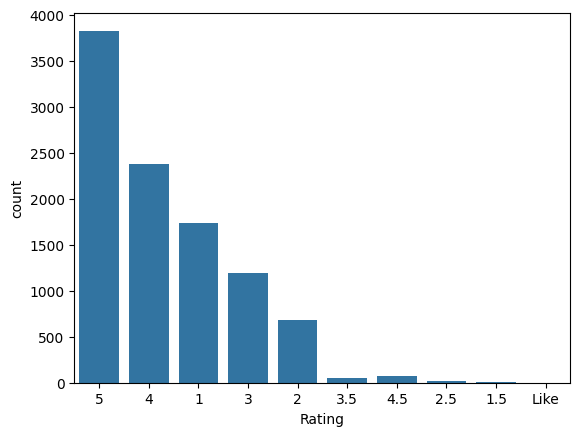

In [ ]:
sns.countplot(x='Rating',data=df)

In [ ]:
df.dtypes

Review    object
Rating    object
dtype: object

In [ ]:
df1=df.loc[(df['Rating']!='Like')&(df['Rating']!='2.5')&(df['Rating']!='3.5')&(df['Rating']!='4.5')&(df['Rating']!='1.5')]
df1

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9991,I was never a fan of Chinese food until I visi...,5
9992,I visited this restaurant with friends and was...,5
9993,"Im going to cut to the chase, The food is exce...",5
9995,Madhumathi Mahajan Well to start with nice cou...,3


In [ ]:
df1.isna().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
df1['Rating'].value_counts()


5    3826
4    2373
1    1735
3    1192
2     684
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

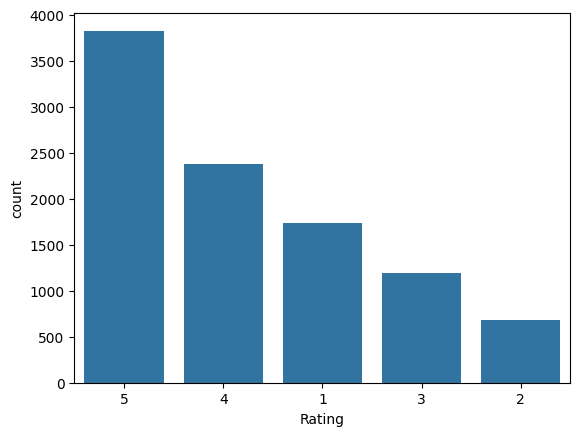

In [ ]:
sns.countplot(x=df1['Rating'])

# NLP(Natural Language Processing)

In [ ]:
Review=df1.Review
Review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9991    I was never a fan of Chinese food until I visi...
9992    I visited this restaurant with friends and was...
9993    Im going to cut to the chase, The food is exce...
9995    Madhumathi Mahajan Well to start with nice cou...
9998    I personally love and prefer Chinese Food. Had...
Name: Review, Length: 9810, dtype: object

Removing Special Characters

In [ ]:
Review=Review.str.replace('[^a-zA-Z0-9 ]','')
Review

0       The ambience was good food was quite good  had...
1       Ambience is too good for a pleasant evening Se...
2       A must try great food great ambience Thnx for ...
3       Soumen das and Arun was a great guy Only becau...
4       Food is goodwe ordered Kodi drumsticks and bas...
                              ...                        
9991    I was never a fan of Chinese food until I visi...
9992    I visited this restaurant with friends and was...
9993    Im going to cut to the chase The food is excel...
9995    Madhumathi Mahajan Well to start with nice cou...
9998    I personally love and prefer Chinese Food Had ...
Name: Review, Length: 9810, dtype: object

Tokenization and Lemmatization

In [ ]:
lemm=WordNetLemmatizer()

In [ ]:
Review=Review.apply(lambda line:[lemm.lemmatize(i.lower(),pos='v') for i in word_tokenize(line)]).apply(lambda i:' '.join(i))
Review

0       the ambience be good food be quite good have s...
1       ambience be too good for a pleasant even servi...
2       a must try great food great ambience thnx for ...
3       soumen das and arun be a great guy only becaus...
4       food be goodwe order kodi drumsticks and baske...
                              ...                        
9991    i be never a fan of chinese food until i visit...
9992    i visit this restaurant with friends and be im...
9993    im go to cut to the chase the food be excellen...
9995    madhumathi mahajan well to start with nice cou...
9998    i personally love and prefer chinese food have...
Name: Review, Length: 9810, dtype: object

Stopword Removal

In [ ]:
stop=stopwords.words('english')

In [ ]:
Review=Review.apply(lambda line:[i for i in word_tokenize(line) if i not in stop]).apply(lambda i:' '.join(i))
Review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant even service prompt foo...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumsticks basket mutto...
                              ...                        
9991    never fan chinese food visit chinese pavilionb...
9992    visit restaurant friends immediately blow away...
9993    im go cut chase food excellent must say honey ...
9995    madhumathi mahajan well start nice courteous s...
9998    personally love prefer chinese food couple tim...
Name: Review, Length: 9810, dtype: object

TF-IDF Vectorisation

In [ ]:
v=TfidfVectorizer()
vector=v.fit_transform(Review)
print(vector)

  (0, 10024)	0.21424101856431763
  (0, 5365)	0.1853851231383839
  (0, 17230)	0.12042900964845243
  (0, 5813)	0.30256034598819515
  (0, 19385)	0.3103509475053397
  (0, 15453)	0.368743467759689
  (0, 8630)	0.14653777561274442
  (0, 4483)	0.2075884086508168
  (0, 1599)	0.11884288970863051
  (0, 14773)	0.11446758113010612
  (0, 3718)	0.24007743380471727
  (0, 18227)	0.368743467759689
  (0, 16030)	0.07726314369799843
  (0, 7040)	0.29607483597177364
  (0, 5272)	0.20325423057586167
  (0, 12562)	0.1572022043176678
  (0, 18256)	0.21805023004748414
  (0, 16996)	0.16403077532474758
  (0, 8239)	0.07227260954587672
  (0, 9179)	0.21023563041457916
  (0, 1734)	0.11165601465566181
  (1, 11917)	0.3709997036703768
  (1, 7571)	0.18161847292680888
  (1, 16705)	0.3149876978748368
  (1, 18566)	0.27566679810164785
  :	:
  (9809, 1938)	0.2004507814501953
  (9809, 5534)	0.25650972145327294
  (9809, 14188)	0.18334327781548374
  (9809, 4154)	0.20903843065348854
  (9809, 2343)	0.1840278772687572
  (9809, 22616)	0

In [ ]:
y=df1['Rating']
y

0       5
1       5
2       5
3       5
4       5
       ..
9991    5
9992    5
9993    5
9995    3
9998    4
Name: Rating, Length: 9810, dtype: object

splitting data for testing and training

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(vector,y,random_state=1,test_size=0.3)

# Model Creation and Model Evaluation

In [ ]:
s=SVC()
m=MultinomialNB()
d=DecisionTreeClassifier(random_state=1)
r=RandomForestClassifier(random_state=1)
l=[s,m,d,r]
for i in l:
  print('********',i,'*******')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

******** SVC() *******
              precision    recall  f1-score   support

           1       0.69      0.84      0.76       517
           2       0.20      0.00      0.01       208
           3       0.41      0.13      0.20       372
           4       0.48      0.54      0.51       727
           5       0.69      0.85      0.76      1119

    accuracy                           0.62      2943
   macro avg       0.49      0.47      0.45      2943
weighted avg       0.57      0.62      0.57      2943

******** MultinomialNB() *******
              precision    recall  f1-score   support

           1       0.81      0.50      0.62       517
           2       0.00      0.00      0.00       208
           3       0.75      0.01      0.02       372
           4       0.36      0.22      0.27       727
           5       0.50      0.96      0.65      1119

    accuracy                           0.51      2943
   macro avg       0.48      0.34      0.31      2943
weighted avg       0.

# prediction

In [ ]:
y_new=s.predict(v.transform(['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.']))
if y_new==1:
  print('rating=1')
elif y_new==2:
  print('rating=2')
elif y_new==3:
  print('rating=3')
elif y_new==4:
  print('rating=4')
else:
  print('rating=5')

rating=5
